This code implements a Tic-Tac-Toe game where a human player competes against an AI. The AI uses a Random Forest Classifier trained on historical game data to make its moves. The game starts by training and evaluating the model, displaying a confusion matrix and classification report. Then, it enters a loop where the player can play multiple games against the AI until they choose to stop.

---


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Training and evaluating the model...


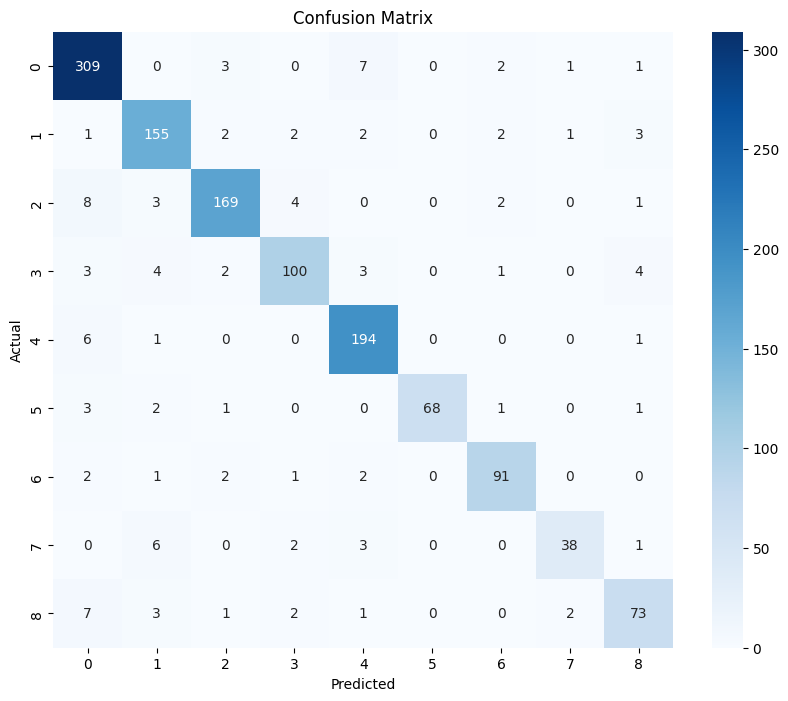

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       323
           1       0.89      0.92      0.90       168
           2       0.94      0.90      0.92       187
           3       0.90      0.85      0.88       117
           4       0.92      0.96      0.94       202
           5       1.00      0.89      0.94        76
           6       0.92      0.92      0.92        99
           7       0.90      0.76      0.83        50
           8       0.86      0.82      0.84        89

    accuracy                           0.91      1311
   macro avg       0.91      0.89      0.90      1311
weighted avg       0.91      0.91      0.91      1311


Model evaluation complete. Press Enter to start the game.

Welcome to Tic-Tac-Toe!
You are X, and the AI is O.
Enter row and column numbers (0-2) separated by a comma to make your move.

-----------------
|R\C| 0 | 1 | 2 |
-----------------
| 0 |   |   |   |
------------

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import random

# This game is a Tic-Tac-Toe implementation where the player competes against an AI.
# The AI uses a Random Forest Classifier trained on historical game data to make its moves.

def train_and_evaluate_model():
    # Load the dataset
    data = pd.read_csv('/content/drive/MyDrive/Data/tictac_single.txt', delimiter=" ", header=None)

    # Prepare features (X) and target (y)
    X = data.iloc[:, :9].values  # First 9 columns are the board state
    y = data.iloc[:, -1].values  # Last column is the next move

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Generate and plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return model

def print_board(board):
    # Print the Tic-Tac-Toe board
    print("-----------------")
    print("|R\\C| 0 | 1 | 2 |")
    for i, row in enumerate(board):
        print("-----------------")
        print(f"| {i} | {' | '.join(row)} |")
    print("-----------------")

def reset_board():
    # Create an empty 3x3 board
    return [[" " for _ in range(3)] for _ in range(3)]

def validate_entry(row, col, board):
    # Check if the move is valid (within bounds and empty)
    if row < 0 or row > 2 or col < 0 or col > 2:
        return False
    return board[row][col] == " "

def check_win(board, player):
    # Check all possible winning combinations
    # Horizontal wins
    for row in range(3):
        if board[row][0] == board[row][1] == board[row][2] == player:
            return True
    # Vertical wins
    for col in range(3):
        if board[0][col] == board[1][col] == board[2][col] == player:
            return True
    # Diagonal wins
    if board[0][0] == board[1][1] == board[2][2] == player:
        return True
    if board[0][2] == board[1][1] == board[2][0] == player:
        return True
    return False

def check_full(board):
    # Check if the board is completely filled
    return all(cell != " " for row in board for cell in row)

def get_human_move(board):
    # Get and validate the human player's move
    while True:
        try:
            row, col = map(int, input("Enter your move (row,col): ").split(","))
            if validate_entry(row, col, board):
                return row, col
            else:
                print("Invalid move. Try again.")
        except ValueError:
            print("Invalid input. Please enter two numbers separated by a comma.")

def get_ai_move(board, model):
    # Convert board to flat list for model input
    flat_board = [1 if cell == 'X' else -1 if cell == 'O' else 0 for row in board for cell in row]
    empty_indices = [i for i, x in enumerate(flat_board) if x == 0]

    # If it's the first move, choose randomly
    if len(empty_indices) == 9:
        return divmod(random.choice(empty_indices), 3)

    # Predict the next move using the trained model
    predicted_move_index = model.predict([flat_board])[0]

    # If the predicted move is valid, use it
    if flat_board[predicted_move_index] == 0:
        return divmod(predicted_move_index, 3)

    # Fallback to a random move if prediction is invalid
    return divmod(random.choice(empty_indices), 3)

def play_game(model):
    # Initialize the game
    board = reset_board()
    current_player = "X"

    while True:
        print_board(board)

        # Get move from current player (human or AI)
        if current_player == "X":
            print(f"{current_player}'s turn.")
            row, col = get_human_move(board)
        else:
            print(f"{current_player}'s turn (AI).")
            row, col = get_ai_move(board, model)
            print(f"AI chooses position ({row}, {col})")

        # Make the move
        board[row][col] = current_player

        # Check for win or draw
        if check_win(board, current_player):
            print_board(board)
            print(f"{current_player} IS THE WINNER!!!")
            break
        elif check_full(board):
            print_board(board)
            print("DRAW! NOBODY WINS!")
            break

        # Switch players
        current_player = "O" if current_player == "X" else "X"

    # Ask if the player wants to play again
    play_again = input("Do you want to play another game? (Y/N): ").strip().lower()
    return play_again == 'y'

if __name__ == "__main__":
    # Train and evaluate the model
    print("Training and evaluating the model...")
    model = train_and_evaluate_model()

    # Wait for user input before starting the game
    print("\nModel evaluation complete. Press Enter to start the game.")
    input()

    # Print game instructions
    print("Welcome to Tic-Tac-Toe!")
    print("You are X, and the AI is O.")
    print("Enter row and column numbers (0-2) separated by a comma to make your move.")
    print()

    # Main game loop
    while True:
        if not play_game(model):
            print("Thank you for playing!")
            break